In [6]:
library(ggplot2)
library(tidyverse)
library(readr)
library(lubridate)
library(purrr)
library(ggpubr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [7]:
covid=read_csv("../input//novel-corona-virus-2019-dataset/covid_19_data.csv");


── Column specification ────────────────────────────────────────────────────────
cols(
  SNo = col_double(),
  ObservationDate = col_character(),
  `Province/State` = col_character(),
  `Country/Region` = col_character(),
  `Last Update` = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double()
)




In [8]:
head(covid)
summary(covid)
covid %>%
  summarise_all(funs(sum(is.na(.))))
nrow(covid)
covid$ObservationDate=ymd(as.Date(covid$ObservationDate,format='%m/%d/%Y'))



covid

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0


      SNo         ObservationDate    Province/State     Country/Region    
 Min.   :     1   Length:172480      Length:172480      Length:172480     
 1st Qu.: 43121   Class :character   Class :character   Class :character  
 Median : 86240   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 86240                                                           
 3rd Qu.:129360                                                           
 Max.   :172480                                                           
 Last Update          Confirmed           Deaths        Recovered      
 Length:172480      Min.   :-302844   Min.   : -178   Min.   :-854405  
 Class :character   1st Qu.:    457   1st Qu.:    6   1st Qu.:     10  
 Mode  :character   Median :   4016   Median :   76   Median :    858  
                    Mean   :  33232   Mean   : 1050   Mean   :  21028  
                    3rd Qu.:  18843   3rd Qu.:  554   3rd Qu.:   7229  
                    Max.   :2290891   Max. 

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,47883,0,0,0,0,0


[1] 172480

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
<dbl>,<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0
6,2020-01-22,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
7,2020-01-22,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
8,2020-01-22,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
9,2020-01-22,Hainan,Mainland China,1/22/2020 17:00,4,0,0


In [9]:

covid=covid%>%select(-`Province/State`)
covid

SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
2,2020-01-22,Mainland China,1/22/2020 17:00,14,0,0
3,2020-01-22,Mainland China,1/22/2020 17:00,6,0,0
4,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
5,2020-01-22,Mainland China,1/22/2020 17:00,0,0,0
6,2020-01-22,Mainland China,1/22/2020 17:00,26,0,0
7,2020-01-22,Mainland China,1/22/2020 17:00,2,0,0
8,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
9,2020-01-22,Mainland China,1/22/2020 17:00,4,0,0


In [10]:
covid

SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
2,2020-01-22,Mainland China,1/22/2020 17:00,14,0,0
3,2020-01-22,Mainland China,1/22/2020 17:00,6,0,0
4,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
5,2020-01-22,Mainland China,1/22/2020 17:00,0,0,0
6,2020-01-22,Mainland China,1/22/2020 17:00,26,0,0
7,2020-01-22,Mainland China,1/22/2020 17:00,2,0,0
8,2020-01-22,Mainland China,1/22/2020 17:00,1,0,0
9,2020-01-22,Mainland China,1/22/2020 17:00,4,0,0


In [11]:
grouped_country=covid%>%group_by(`Country/Region`)
grouped_date=covid%>%group_by(ObservationDate)


In [12]:
grouped_country=grouped_country%>%summarise(Confirmed=sum(Confirmed),Fatality_Rate=sum(Deaths)/sum(Confirmed)) 

`summarise()` ungrouping output (override with `.groups` argument)



In [13]:
grouped_country %>% arrange(desc(Confirmed)) %>% .[1:20,]

Country/Region,Confirmed,Fatality_Rate
<chr>,<dbl>,<dbl>
US,1281680801,0.03006028
India,833624817,0.01623739
Brazil,711618065,0.03150914
Russia,224217320,0.01654970
France,145444435,0.05343471
Spain,141619421,0.05295266
UK,123052469,0.08151772
Peru,119805877,0.03941352
Colombia,117658640,0.03040518


`summarise()` ungrouping output (override with `.groups` argument)



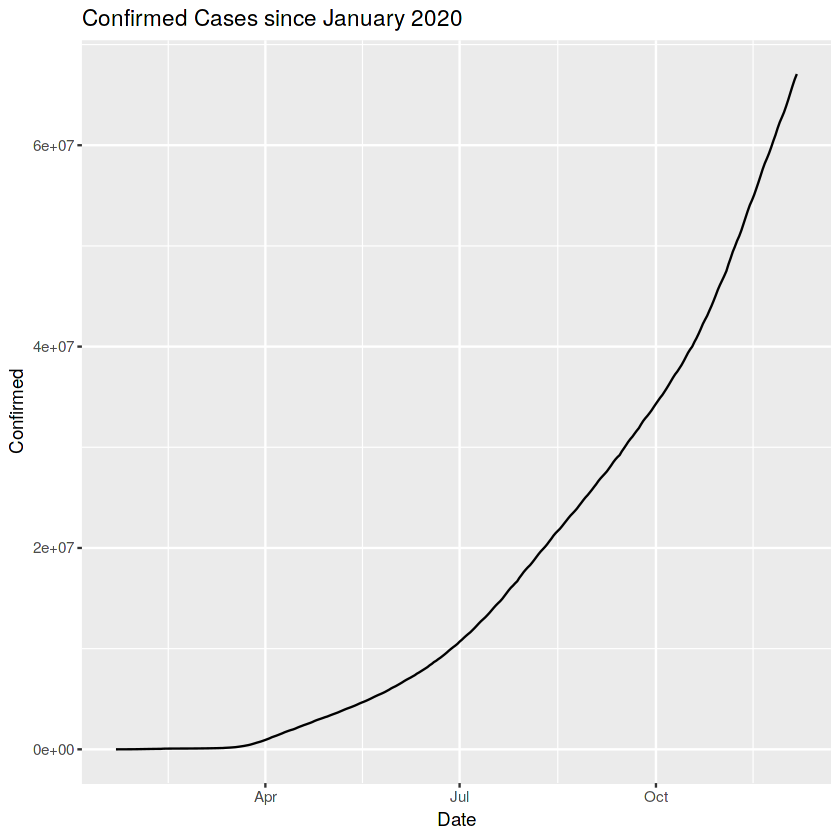

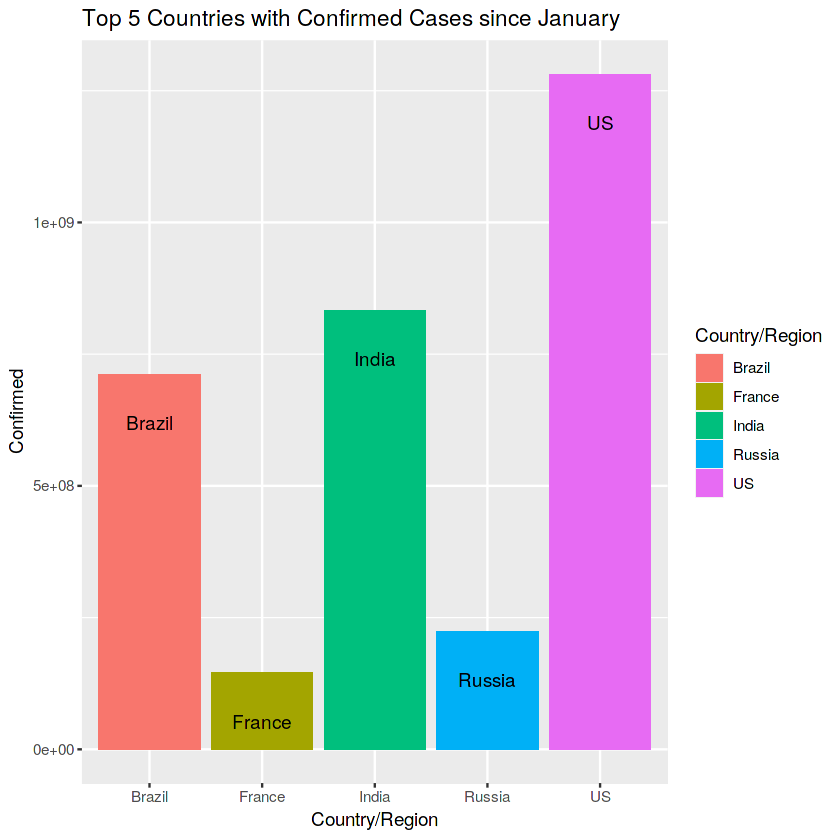

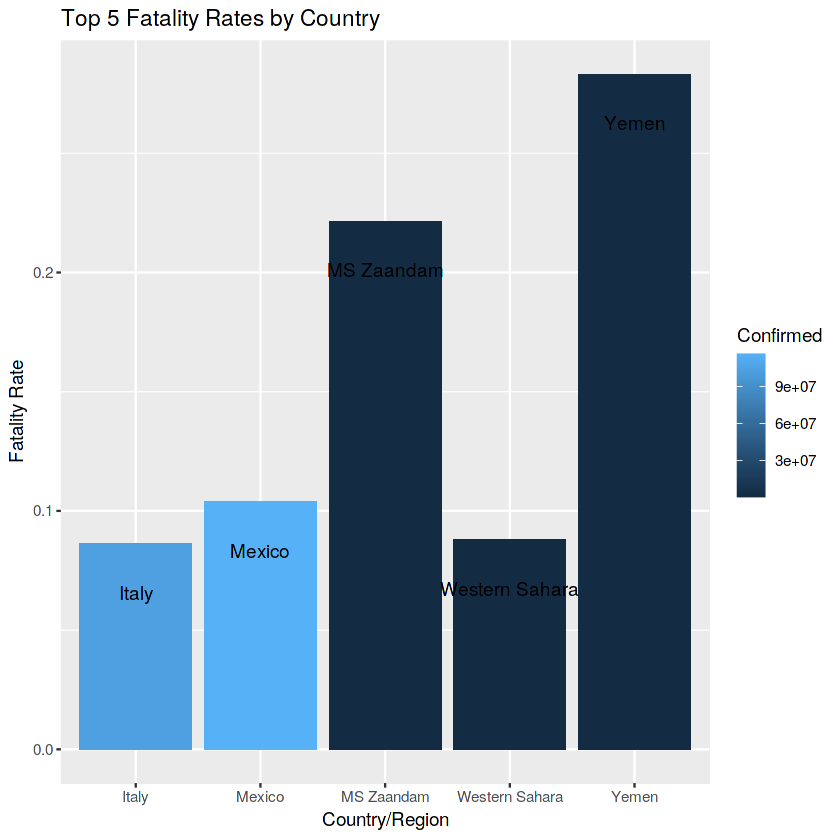

In [14]:
grouped_date%>%summarise(Confirmed=sum(Confirmed)) %>% ggplot(aes(x=ObservationDate,y=Confirmed))+geom_line()+ggtitle("Confirmed Cases since January 2020") + xlab("Date")

grouped_country %>% arrange(desc(Confirmed)) %>% .[1:5,]%>% ggplot(aes(x=`Country/Region`,y=Confirmed,fill=`Country/Region`,label=`Country/Region`))+geom_bar(stat="identity")+geom_text(vjust=4) + ggtitle("Top 5 Countries with Confirmed Cases since January")

grouped_country %>% arrange(desc(Fatality_Rate)) %>% .[1:5,]%>% ggplot(aes(x=`Country/Region`,y=Fatality_Rate,fill=Confirmed,label=`Country/Region`))+geom_bar(stat="identity")+geom_text(vjust=4) + ggtitle("Top 5 Fatality Rates by Country") + ylab("Fatality Rate")




In [15]:
grouped_date=covid%>%filter(`Country/Region`=='US')%>%group_by(ObservationDate=floor_date(ObservationDate,"1 week"))
#grouped_date%>%summarise(Confirmed=sum(Confirmed)) %>% ggplot(aes(x=ObservationDate,y=Confirmed))+geom_line()+ggtitle("Confirmed Cases since January 2020") + xlab("Date")



`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



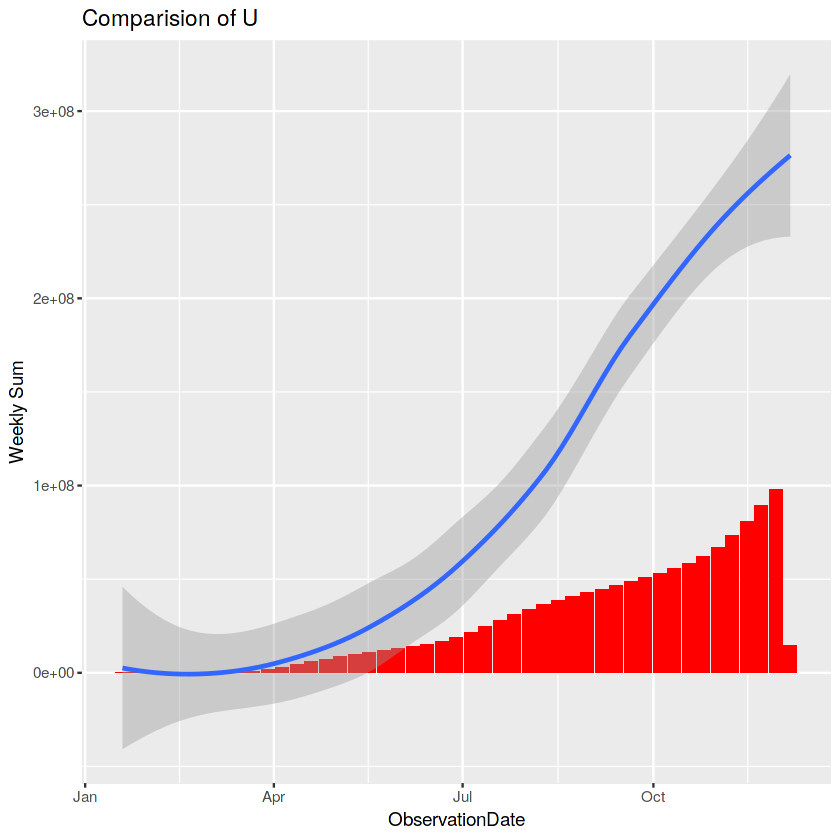

In [27]:
USCovidWeekly=covid%>%filter(`Country/Region`=='US')%>%group_by(ObservationDate=floor_date(ObservationDate,"1 week")) %>% summarise('Weekly Sum'=sum(Confirmed)) %>%ggplot(aes(x=ObservationDate,y=`Weekly Sum`))+geom_bar(stat="identity",fill='Red')
WorldCovidWeekly= covid%>%filter(`Country/Region`!='US') %>% group_by(ObservationDate=floor_date(ObservationDate,"1 week"))%>% summarise('Weekly Sum' = sum(Confirmed)) 

USCovidWeekly+geom_smooth(data=WorldCovidWeekly,aes(x=ObservationDate,y=`Weekly Sum`))+ggtitle("Comparision of United States and World Weekly")



